`summarise()` has grouped output by 'id', 'group', 'state'. You can override using the `.groups` argument.


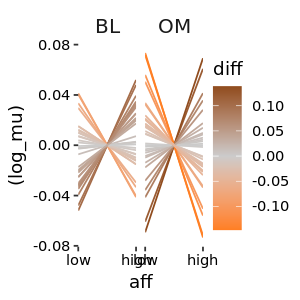

In [247]:
ggplot(df.mu %>%
           group_by(id,group,state,aff) %>% summarise(log_mu = mean(log_mu, na.rm=T)) %>% 
           group_by(id,group,state) %>% mutate(log_mu = log_mu-mean(log_mu)) %>%
           spread(aff, log_mu) %>% mutate(diff = high-low) %>% gather(aff,log_mu, low,high) %>% 
           mutate(aff = factor(aff, levels = c("low","high"))),
       aes(x = aff, y = (log_mu), color = diff, shape = aff, group = id)) +
facet_grid(. ~ state) +

# --- data
#geom_violin() + 
geom_line(alpha = 1) + 

# --- aesthetics
scale_x_discrete(expand = expansion(mult=c(0))) +
scale_colour_gradient2(
  low = aff.colors["low"],
  mid = "grey80",
  high = aff.colors["high"])
#scale_color_manual(values = aff.colors) 

Joining, by = "id"
`geom_smooth()` using formula 'y ~ x'



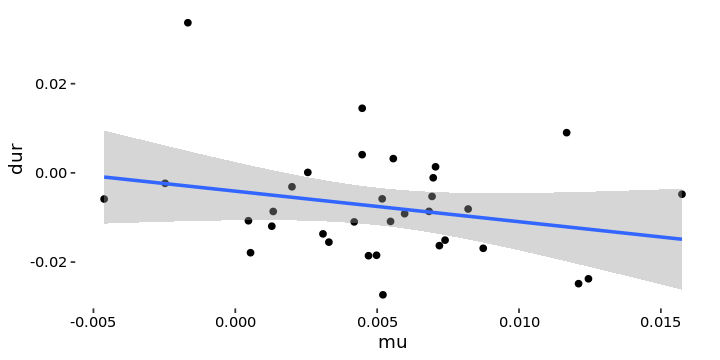

In [840]:
df.slopes <- left_join(coef(m.dur)$id %>% rownames_to_column("id") %>% select(id, run) %>% rename(dur = run),
                       coef(m.mu)$id %>% rownames_to_column("id") %>% select(id, run) %>% rename(mu = run))

df.slopes %>% 
    ggplot(aes(x = mu, y = dur)) +
    geom_point() +
    geom_smooth(method = "lm")
          

In [847]:
cor.test(formula = ~ mu + dur, data = df.slopes)


	Pearson's product-moment correlation

data:  mu and dur
t = -1.4164, df = 31, p-value = 0.1666
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5438185  0.1057194
sample estimates:
       cor 
-0.2465376 


(Intercept) group1      state1        aff1          percept1    
4    0.56972823 -0.07448839 -0.0115950276  0.0039296252  0.008788691
11   0.88313817 -0.07448839  0.0235138879  0.0004518451 -0.030797151
28   0.36985705 -0.07448839  0.0091207725  0.0171787100 -0.029035149
29  -0.14865838 -0.07448839  0.0017163508 -0.0054059979  0.002476760
30   0.71074902 -0.07448839  0.0038440237 -0.0104592024  0.008239013
40   0.83255594 -0.07448839 -0.0141816492 -0.0120020750  0.027256141
42   0.97773121 -0.07448839 -0.0636947939 -0.0200920661  0.072868071
50  -0.13110766 -0.07448839 -0.0005267108  0.0009650590 -0.011192793
51  -0.03948674 -0.07448839  0.0289007213 -0.0022844145 -0.019628215
53   0.95992818 -0.07448839  0.0034702609  0.0036619863 -0.007259791
57   2.14490458 -0.07448839  0.0069519431 -0.0029949584  0.003436397
58  -0.01061210 -0.07448839 -0.0073098681 -0.0089793568  0.027921732
65   0.88573375 -0.07448839  0.0277111134 -0.0061226678 -0.015924434
68   1.01557759 -0.07448839  0.0817064704 -0.0045677181 -0.053032017
69   1.73581087 -0.07448839  0.0409174227 -0.0149308764 -0.004997433
74   0.84964833 -0.07448839 -0.0405410587  0.0177105180 -0.010593914
75  -0.08991475 -0.07448839  0.0195847094 -0.0126552033  0.002154804
76   0.67085674 -0.07448839 -0.0378694431 -0.0071895927  0.033511705
78   0.27019927 -0.07448839  0.0088235785 -0.0142143487  0.012403080
79   0.48871521 -0.07448839  0.0367063542  0.0067673561 -0.046725455
80   0.40744141 -0.07448839  0.0378198005  0.0039742531 -0.034759695
82   1.60935133 -0.07448839 -0.0014544429  0.0063260951 -0.009658435
87   0.73897526 -0.07448839  0.0123354372  0.0135298697 -0.027641619
90   0.67020049 -0.07448839  0.0161135250 -0.0070322403 -0.007254010
91   0.97479359 -0.07448839 -0.0284725220 -0.0269632545  0.071541343
94   0.91753522 -0.07448839 -0.0416253433 -0.0353243657  0.096022720
96   0.73883443 -0.07448839 -0.0040896612  0.0005144985  0.009726687
98   0.60447807 -0.07448839  0.0132208635  0.0048820094 -0.024679524
99   0.83898675 -0.07448839  0.0134198464 -0.0054409562  0.014810141
104  0.12279675 -0.07448839  0.0118314285 -0.0246549671  0.033811132
105 -0.32991607 -0.07448839 -0.0070728439 -0.0186741753  0.029066906
108  0.55905998 -0.07448839  0.0039365085 -0.0065462058  0.004830477
109  0.81027740 -0.07448839 -0.0144541922 -0.0081970250  0.026267117
    percept2      run           group1:state1 group1:aff1  state1:aff1
4    0.1171300254  0.0069768117 2.639265e-05  -0.007737048 -0.03353331
11   0.0268447816  0.0120992106 2.639265e-05  -0.007737048 -0.03353331
28   0.0194475757  0.0068286693 2.639265e-05  -0.007737048 -0.03353331
29   0.0240511255 -0.0024743317 2.639265e-05  -0.007737048 -0.03353331
30   0.0459603284  0.0082063353 2.639265e-05  -0.007737048 -0.03353331
40   0.0507479762  0.0055694652 2.639265e-05  -0.007737048 -0.03353331
42   0.0632352489  0.0116793579 2.639265e-05  -0.007737048 -0.03353331
50   0.0553269594  0.0019974286 2.639265e-05  -0.007737048 -0.03353331
51  -0.0007223363  0.0005372697 2.639265e-05  -0.007737048 -0.03353331
53   0.1203445485  0.0052041756 2.639265e-05  -0.007737048 -0.03353331
57   0.0177131273  0.0032991312 2.639265e-05  -0.007737048 -0.03353331
58   0.0415962005  0.0013370694 2.639265e-05  -0.007737048 -0.03353331
65  -0.0073672131  0.0051779623 2.639265e-05  -0.007737048 -0.03353331
68  -0.0494433513  0.0069350870 2.639265e-05  -0.007737048 -0.03353331
69  -0.0750053884  0.0025556528 2.639265e-05  -0.007737048 -0.03353331
74   0.0434337945  0.0041911455 2.639265e-05  -0.007737048 -0.03353331
75   0.0084683497  0.0059686966 2.639265e-05  -0.007737048 -0.03353331
76   0.0695261258  0.0044707043 2.639265e-05  -0.007737048 -0.03353331
78   0.0061519492  0.0046964827 2.639265e-05  -0.007737048 -0.03353331
79   0.0141867216 -0.0046224884 2.639265e-05  -0.007737048 -0.03353331
80   0.0419375405  0.0071936502 2.639265e-05  -0.007737048 -0.03353331
82   0.1221620397  0.0049777736 2.639265e-05  -0.007737048 -0.03353331
87   0.0549077190  0.0124

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



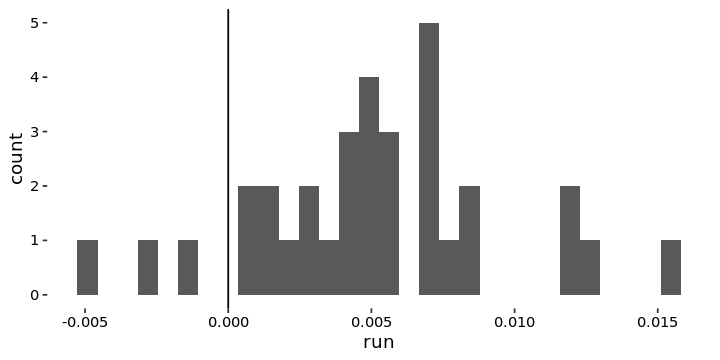

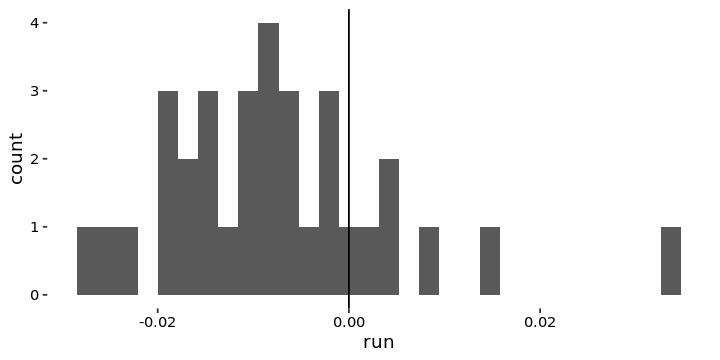

In [824]:
summary(m.mu) -> a
#a

coef(m.mu)$id
coef(m.mu)$id %>% ggplot(aes(x = run)) + geom_histogram() + geom_vline(xintercept = 0)
coef(m.dur)$id %>% ggplot(aes(x = run)) + geom_histogram() + geom_vline(xintercept = 0)

`geom_smooth()` using formula 'y ~ x'



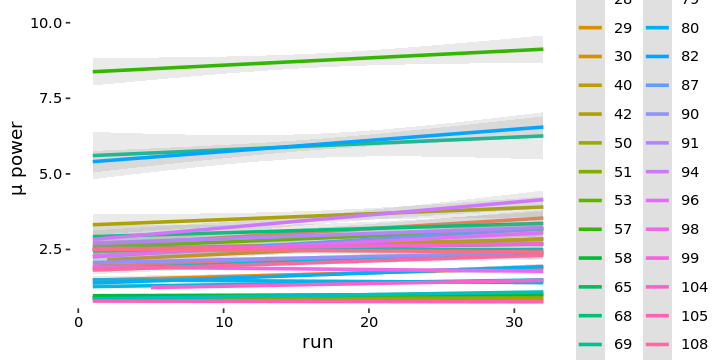

In [822]:
df.mu %>%
    mutate(run==lead(run)) %>% 
    group_by(id,run) %>% summarise(log_mu = mean(log_mu, na.rm=T)) %>% 

ggplot(aes(x = run, y = exp(log_mu), color = id)) +
geom_smooth(alpha = 0.2, method="lm") +
coord_cartesian(ylim = c(1, 10)) +
labs(y = "µ power")


`geom_smooth()` using formula 'y ~ x'



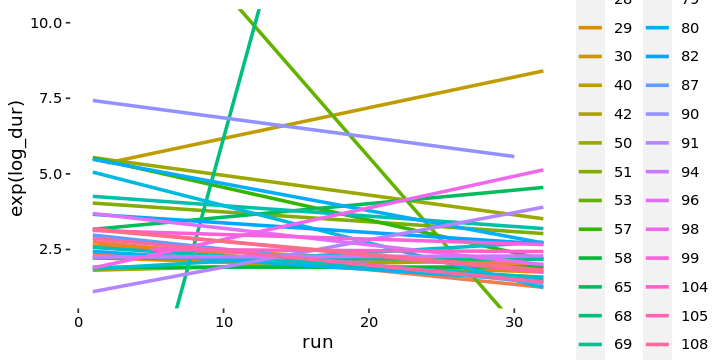

In [805]:
df.mu %>%
    mutate(run==lead(run)) %>% 
    group_by(id,run) %>% summarise(log_dur = mean(log_dur, na.rm=T)) %>% 

ggplot(aes(x = run, y = exp(log_dur), color = id)) +
geom_smooth(alpha = 0, method="lm") +
coord_cartesian(ylim = c(1, 10))